In [31]:
# imports
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
# load the data
bike_sales = pd.read_csv("~/Code/WorkspacePython/MachineLearningPython/Datasets/Courses/FreeCodeCamp/sales_data.csv")



In [5]:
# get info on the data
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [6]:
# get stats on the data
bike_sales.describe()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


In [7]:
# head the data
bike_sales.head()


,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [18]:
# list the columns
print("the sales data columns are {}".format(bike_sales.columns))

the sales data columns are Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Customer_Gender',
       'Country', 'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Revenue'],
      dtype='object')


In [12]:
# look at the difference between mean and median to see which fields likely have outliers
for index in ['Revenue', 'Profit', 'Unit_Cost', 'Unit_Price', 'Order_Quantity']:
    print("{} as mean of {} and median of {}".format(index, bike_sales[index].mean(), bike_sales[index].median()))




Revenue as mean of 772.758 and median of 226.0
Profit as mean of 291.6534 and median of 103.0
Unit_Cost as mean of 278.415 and median of 9.0
Unit_Price as mean of 470.6806 and median of 25.0
Order_Quantity as mean of 11.8204 and median of 10.0


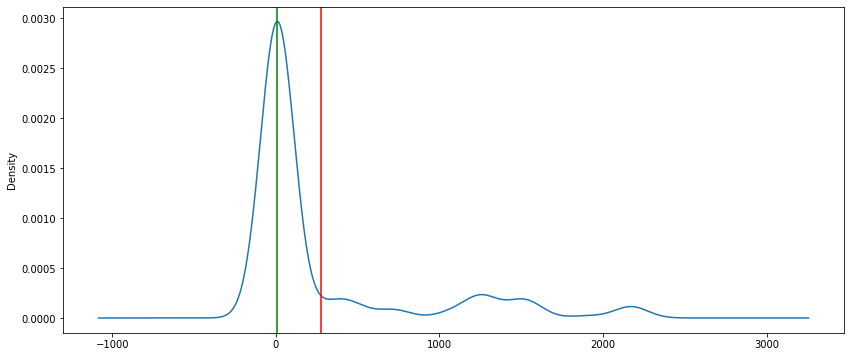

In [14]:
# plot a density distribution
ax = bike_sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(bike_sales['Unit_Cost'].mean(), color='red')
ax.axvline(bike_sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

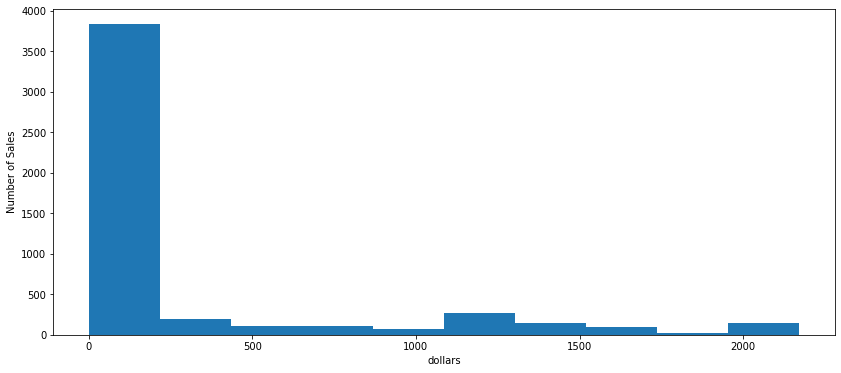

In [15]:
# histogram plot
ax = bike_sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')


In [17]:
# get the categorical value counts
bike_sales['Country'].value_counts()


United States     1700
Australia         1066
Canada             657
United Kingdom     604
France             489
Germany            484
Name: Country, dtype: int64

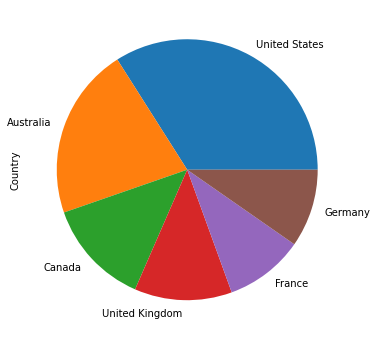

In [20]:
# pie chart the country data
bike_sales['Country'].value_counts().plot(kind='pie', figsize=(14,6))


Text(0, 0.5, 'Number of Sales')

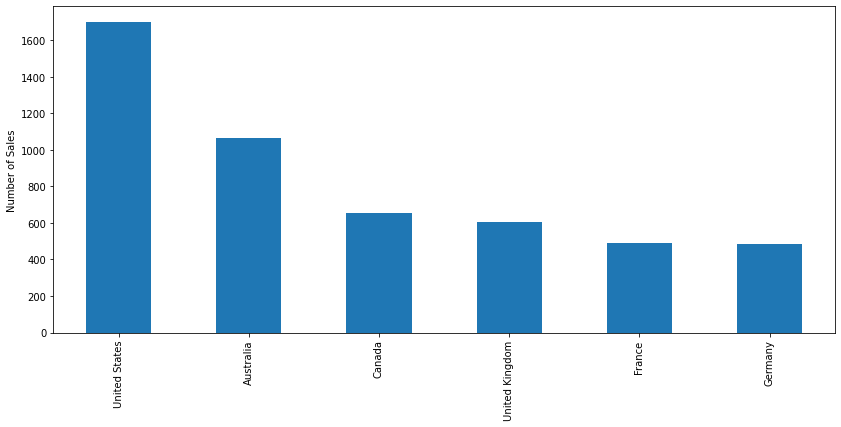

In [25]:
# plot a histogram of the country distribution
chart = bike_sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))
chart.set_ylabel('Number of Sales')

In [27]:
# look at the correlation of the columns
corr = bike_sales.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
Day,1.000000,0.011273,-0.041570,0.005158,-0.006798,-0.006037,0.000213,0.001869
Year,0.011273,1.000000,0.021746,0.134928,-0.226905,-0.223659,-0.189203,-0.222348
Customer_Age,-0.041570,0.021746,1.000000,0.020514,-0.011745,-0.011033,0.005194,-0.008003
Order_Quantity,0.005158,0.134928,0.020514,1.000000,-0.519821,-0.519955,-0.237331,-0.316175
Unit_Cost,-0.006798,-0.226905,-0.011745,-0.519821,1.000000,0.997900,0.747865,0.829000
Unit_Price,-0.006037,-0.223659,-0.011033,-0.519955,0.997900,1.000000,0.755063,0.828298
Profit,0.000213,-0.189203,0.005194,-0.237331,0.747865,0.755063,1.000000,0.958713
Revenue,0.001869,-0.222348,-0.008003,-0.316175,0.829000,0.828298,0.958713,1.000000


([<matplotlib.axis.YTick at 0x7f8c30adf410>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Revenue')])

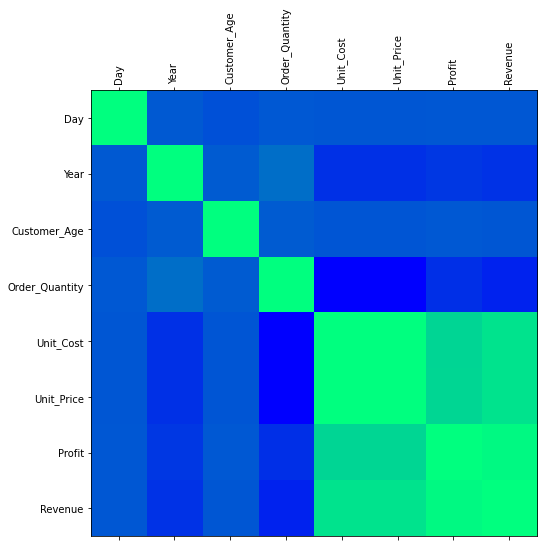

In [35]:
# do a heat map of the correlation
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='winter', fignum=fig.number)
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)